In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

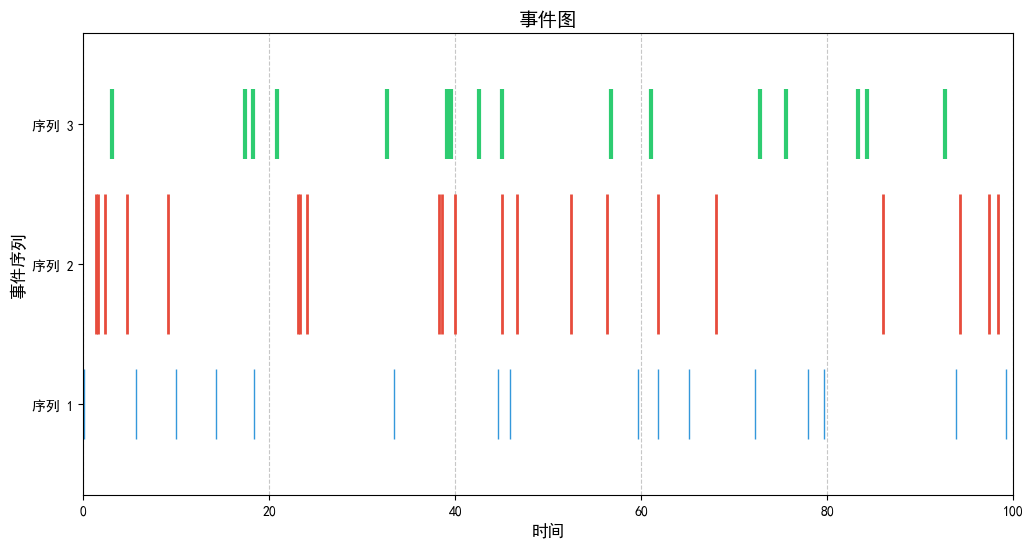

In [3]:
# 生成3个事件序列，每个序列包含随机数量的事件时间点
np.random.seed(42)
num_sequences = 3
event_sequences = []
for i in range(num_sequences):
    num_events = np.random.randint(10, 30)
    events = np.random.uniform(0, 100, num_events)
    event_sequences.append(np.sort(events))  # 排序使时间有序

plt.figure(figsize=(12, 6))

# 绘制事件图
plt.eventplot(
    event_sequences,                             # 事件发生的位置
    lineoffsets=np.arange(num_sequences),        # 每个序列的垂直偏移
    linelengths=[0.5, 1.0, 0.5],                 # 每个序列的事件线长度
    linewidths=[1, 2, 3],                        # 每个序列的事件线宽度
    colors=['#3498db', '#e74c3c', '#2ecc71'],    # 每个序列不同颜色
    linestyles='solid'                           # 事件线样式
)

plt.title('事件图', fontsize=14)
plt.xlabel('时间', fontsize=12)
plt.ylabel('事件序列', fontsize=12)
plt.yticks(np.arange(num_sequences), [f'序列 {i+1}' for i in range(num_sequences)])
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 2、使用示例：

### 示例 1：组合其他图表

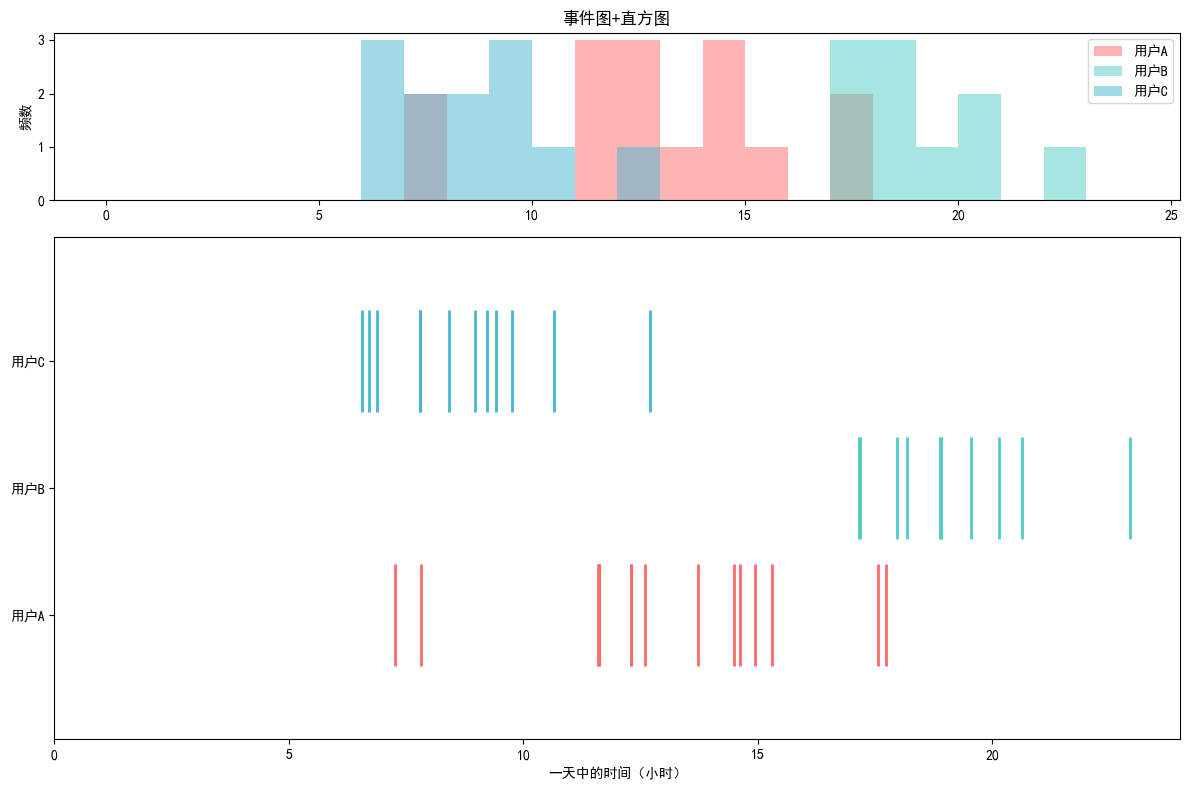

In [4]:
from datetime import datetime, timedelta

# 生成模拟数据：三个用户一天中的访问时间（小时）
np.random.seed(42)
user1_visits = np.random.normal(13, 3, 15)  # 下午1点左右活跃
user2_visits = np.random.normal(20, 2, 10)  # 晚上8点左右活跃  
user3_visits = np.random.normal(9, 2, 12)   # 早上9点左右活跃
# 过滤不合理的时间值：确保所有时间都在0-24小时范围内
user1_visits = user1_visits[(user1_visits >= 0) & (user1_visits <= 24)]
user2_visits = user2_visits[(user2_visits >= 0) & (user2_visits <= 24)]
user3_visits = user3_visits[(user3_visits >= 0) & (user3_visits <= 24)]
# 数据整理：将三个用户的数据、标签和颜色分别存入列表，便于后续循环处理
data = [user1_visits, user2_visits, user3_visits]
labels = ['用户A', '用户B', '用户C']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# # 创建图形和子图：2行1列的布局，gridspec_kw参数设置上下子图的高度比例为1:3
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), 
                              gridspec_kw={'height_ratios': [1, 3]})

# 上部子图：绘制访问时间密度分布图（直方图）
for i, d in enumerate(data):
    ax1.hist(d, bins=24, range=(0, 24), alpha=0.5, 
             label=labels[i], color=colors[i])
ax1.legend()
ax1.set_title('事件图+直方图')
ax1.set_ylabel('频数')

# 下部子图：绘制事件图，展示每个用户的具体访问时间点
ax2.eventplot(data, colors=colors, linelengths=0.8, linewidths=2)
ax2.set_yticks([0, 1, 2])
ax2.set_yticklabels(labels)
ax2.set_xlabel('一天中的时间（小时）')
ax2.set_xlim(0, 24)

plt.tight_layout()
plt.show()

### 示例 2：返回值

返回值类型: <class 'list'>
返回值长度: 2
每个元素的类型: <class 'matplotlib.collections.EventCollection'>


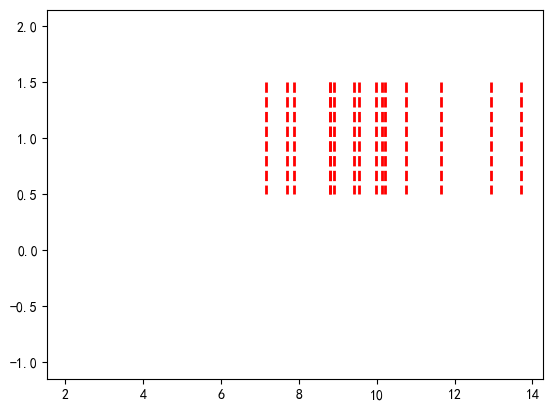

In [5]:
# 生成示例数据
np.random.seed(42)
data = [np.random.normal(5, 1.5, 20), 
        np.random.normal(10, 2, 15)]

# 绘制事件图并获取返回值
event_collections = plt.eventplot(data, orientation='horizontal')
# 打印返回值信息，展示其数据类型和结构
print(f"返回值类型: {type(event_collections)}")
print(f"返回值长度: {len(event_collections)}")
print(f"每个元素的类型: {type(event_collections[0])}")

# ========通过返回值对事件图进行后处理操作============
# 隐藏第一组事件（索引为 0 的 EventCollection 对象）
event_collections[0].set_visible(False)

# 动态修改第二组事件（索引为 1）的样式
event_collections[1].set_color('red')          # 将事件线颜色改为红色
event_collections[1].set_linewidths(2)         # 将线条宽度设置为 2
event_collections[1].set_linestyles('dashed')  # 将线条样式改为虚线

plt.show()